<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Study-Description" data-toc-modified-id="Study-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Study Description</a></span></li><li><span><a href="#Librairies" data-toc-modified-id="Librairies-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Librairies</a></span></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data cleaning</a></span></li><li><span><a href="#Table-1" data-toc-modified-id="Table-1-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Table 1</a></span></li><li><span><a href="#Fig---Behavioral-opportunities" data-toc-modified-id="Fig---Behavioral-opportunities-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Fig - Behavioral opportunities</a></span></li><li><span><a href="#Fig---Survey-Time-of-First-Reported-Action" data-toc-modified-id="Fig---Survey-Time-of-First-Reported-Action-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Fig - Survey Time of First Reported Action</a></span></li><li><span><a href="#Fig---Upward-Clo-Adjust-by-Time-of-Day" data-toc-modified-id="Fig---Upward-Clo-Adjust-by-Time-of-Day-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Fig - Upward Clo Adjust by Time of Day</a></span></li><li><span><a href="#Fig---Downward-Clo-Adjust-by-Time-of-Day" data-toc-modified-id="Fig---Downward-Clo-Adjust-by-Time-of-Day-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Fig - Downward Clo Adjust by Time of Day</a></span></li><li><span><a href="#Generating-Table---Occupant-Sample-Characteristics" data-toc-modified-id="Generating-Table---Occupant-Sample-Characteristics-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Generating Table - Occupant Sample Characteristics</a></span></li><li><span><a href="#Fig.-Preferres-temperature-sensations" data-toc-modified-id="Fig.-Preferres-temperature-sensations-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Fig. Preferres temperature sensations</a></span></li></ul></div>

# Study Description

45 occupant responses. 
24 occupants was selected for participation in the full longitudinal study using a non-proportionate quota sampling strategy.

TOPICS
- energy consumption
- Indoor Environmental Quality

LEADING TO SIGNIFICANT ATTENTION IN 
- building design
- operation processes

TARGETS
- The general frequency of thermally adaptive behaviors in a field office environment.
- Temporal dynamics in thermal comfort and behavior, within a day and across all four seasons.
- The relative effectiveness of indoor and outdoor temperature in describing the probability of a given behavioral state.

ADDITIONALE TARGETS
- Long-term comfort and behavior in an air-conditioned office building located in a dense urban context and subtropical climate with hot, humid summers and cold winters.
- Direct consideration of personal thermal acceptability ranges as they relate to inter-individual variation in thermal comfort and behavior.
- The sequencing/hierarchy of available behavioral actions.
- Social restrictions on behavior and other reasons that occupants may not take available adaptive actions.
- Analysis of high-resolution datalogger information on personal fan/heater use as well as on windows.

# Librairies

In [315]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import datestr
import datetime

# Data cleaning

In [316]:
df=pd.read_csv(r'../OccupantBehaviorEnvironmentData/data/Data_ColNamed.csv', sep='/')

In [317]:
df.head()

,Unnamed: 0,0_time,0_occupant_nb,0_occupancy_1,0_occupancy_2,0_survey_time,1_in_temp,1_in_hum,1_in_air_vel,1_in_rad_temp,...,4_eff_blinds,4_report_dcmft,5_pt_prod,5_pt_cmft_pleas,5_pt_wish,5_pt_others,5_pt_nrg_eff,5_pt_mgmt,5_pt_typ,6_pmv
0,0,735080.000000,1.0,0.0,0.0,NaN,24.584695,63.517,0.030988,24.584695,...,0.0,NaN,1.0,1.0,2.0,4.0,2.0,2.0,4.0,-0.270899
1,1,735080.010417,1.0,0.0,0.0,NaN,24.584695,63.704,0.030988,24.584695,...,0.0,NaN,1.0,1.0,2.0,4.0,2.0,2.0,4.0,-0.269505
2,2,735080.020833,1.0,0.0,0.0,NaN,24.584695,63.856,0.030988,24.584695,...,0.0,NaN,1.0,1.0,2.0,4.0,2.0,2.0,4.0,-0.268373
3,3,735080.031250,1.0,0.0,0.0,NaN,24.584695,64.039,0.030988,24.584695,...,0.0,NaN,1.0,1.0,2.0,4.0,2.0,2.0,4.0,-0.267009
4,4,735080.041667,1.0,0.0,0.0,NaN,24.498384,64.282,0.030988,24.498384,...,0.0,NaN,1.0,1.0,2.0,4.0,2.0,2.0,4.0,-0.297025


In [318]:
# Divide the columns based on category
# Seperate dependent and independent variables TBC if useful
col_general = ['0_time','0_occupant_nb','0_occupancy_1','0_occupancy_2','0_survey_time']

col_env = ['1_in_temp','1_in_hum','1_in_air_vel','1_in_rad_temp','1_in_lum','1_in_co2','1_out_temp','1_out_hum','1_out_air_vel']
              
col_pers_charact = ['2_met_rate_15min','2_met_rate_60min','2_clth_level','2_clth_level_wtchair','2_min_acc_sen','2_med_acc_sen',
              '2_max_acc_sen','2_min_acc','2_med_acc','2_max_acc','2_therm_pref','2_gender','2_age','2_off_type','2_floor_nb',
              '2_loc_floor','2_min_acc_sen_sum','2_min_acc_sen_win','2_med_acc_sen_sum','2_med_acc_sen_win','2_max_acc_sen_sum',
              '2_max_acc_sen_win'] 

col_conf_prod = ['3_gen_th_cmf','3_th_cmf_mvmt','3_dcmf_head','3_dcmf_chest','3_dcmf_back','3_dcmf_pelvis','3_dcmf_arms',
              '3_dcmf_hands','3_dcmf_legs','3_dcmf_feet','3_dcmf_all','3_th_sen','3_th_sen_mvmt','3_rel_busy',
              '3_rel_product','3_gen_satisf_wspace','3_gen_satisf_wpriv','3_gen_th_cmft','3_gen_satisf_wcontrol']

col_behavior = ['4_fan_heat_class','4_state_fan_heat','4_state_window','4_crt_th_cool_spt','4_base_th_cool_spt',
              '4_crt_th_heat_spt','4_base_th_heat_spt','4_clth_change','4_clth_change_up','4_clth_change_down','4_net_clth_change',
              '4_drinking','4_pp_cold_drink','4_pp_warm_drink','4_act_window','4_state_window','4_when_act_window','4_act_door',
              '4_state_door','4_when_act_door','4_act_blinds','4_state_blinds','4_when_act_blinds','4_act_lc_fan','4_state_lc_fan',
              '4_when_act_lc_fan','4_act_lc_heater','4_state_lc_heater','4_when_act_lc_heater','4_act_thermostat','4_state_thermostat',
              '4_when_act_thermostat','4_rsn_no_window','4_rsn_no_door','4_rsn_no_blinds','4_rsn_no_lc_fan','4_rsn_no_lc_heater',
              '4_rsn_no_thermostat','4_avail_clth','4_avail_drinks','4_avail_lc_heater','4_avail_lc_fan','4_avail_thermostat',
              '4_avail_window','4_avail_door','4_avail_blinds','4_eff_clth','4_eff_drinks','4_eff_lc_heater','4_eff_lc_fan',
              '4_eff_thermostat','4_eff_window','4_eff_door','4_eff_blinds','4_report_dcmft']

col_personal_values = ['5_pt_prod','5_pt_cmft_pleas','5_pt_wish','5_pt_others','5_pt_nrg_eff','5_pt_mgmt','5_pt_typ','6_pmv']

#col_target = []

In [319]:
df[col_general].isna().sum()

0_time                0
0_occupant_nb         0
0_occupancy_1         0
0_occupancy_2         0
0_survey_time    838487
dtype: int64

In [320]:
df[col_general].describe()

,0_time,0_occupant_nb,0_occupancy_1,0_occupancy_2,0_survey_time
count,840984.000000,840984.000000,840984.000000,840984.000000,2497.000000
mean,735262.500000,12.500000,0.228208,0.037568,1.971165
std,105.369493,6.922191,0.419677,0.190149,0.811556
min,735080.000000,1.000000,0.000000,0.000000,1.000000
25%,735171.250000,6.750000,0.000000,0.000000,1.000000
50%,735262.499999,12.500000,0.000000,0.000000,2.000000
75%,735353.749999,18.250000,0.000000,0.000000,3.000000
max,735444.999999,24.000000,1.000000,1.000000,3.000000


In [321]:
df[col_env].isna().sum()

1_in_temp         65526
1_in_hum              0
1_in_air_vel          0
1_in_rad_temp     65526
1_in_lum         709696
1_in_co2         766391
1_out_temp        52634
1_out_hum         52634
1_out_air_vel     52634
dtype: int64

In [322]:
df[col_pers_charact].isna().sum()

2_met_rate_15min             0
2_met_rate_60min             0
2_clth_level             29952
2_clth_level_wtchair     29952
2_min_acc_sen                0
2_med_acc_sen                0
2_max_acc_sen                0
2_min_acc                29952
2_med_acc                29952
2_max_acc                29952
2_therm_pref            840418
2_gender                 52380
2_age                    86036
2_off_type               52380
2_floor_nb               52380
2_loc_floor              52380
2_min_acc_sen_sum        52380
2_min_acc_sen_win        52380
2_med_acc_sen_sum        52380
2_med_acc_sen_win        52380
2_max_acc_sen_sum        52380
2_max_acc_sen_win        52380
dtype: int64

In [323]:
df[col_conf_prod].isna().sum()

3_gen_th_cmf             838488
3_th_cmf_mvmt            839074
3_dcmf_head              840956
3_dcmf_chest             840964
3_dcmf_back              840961
3_dcmf_pelvis            840984
3_dcmf_arms              840963
3_dcmf_hands             840963
3_dcmf_legs              840977
3_dcmf_feet              840966
3_dcmf_all               840906
3_th_sen                 838487
3_th_sen_mvmt            839074
3_rel_busy               839593
3_rel_product            839709
3_gen_satisf_wspace       52380
3_gen_satisf_wpriv        52380
3_gen_th_cmft             52380
3_gen_satisf_wcontrol     52380
dtype: int64

In [324]:
df[col_behavior].isna().sum()

4_fan_heat_class         562389
4_state_fan_heat         562389
4_state_window           571519
4_crt_th_cool_spt        133435
4_base_th_cool_spt       470611
4_crt_th_heat_spt        133440
4_base_th_heat_spt       470611
4_clth_change            838487
4_clth_change_up         838487
4_clth_change_down       838487
4_net_clth_change        838487
4_drinking               838487
4_pp_cold_drink          840667
4_pp_warm_drink          840785
4_act_window             838487
4_state_window           571519
4_when_act_window        840956
4_act_door               838487
4_state_door             840911
4_when_act_door          840946
4_act_blinds             838487
4_state_blinds           840954
4_when_act_blinds        840966
4_act_lc_fan             838487
4_state_lc_fan           840851
4_when_act_lc_fan        840913
4_act_lc_heater          838487
4_state_lc_heater        840923
4_when_act_lc_heater     840958
4_act_thermostat         838487
4_state_thermostat       840970
4_when_a

In [325]:
df[col_personal_values].isna().sum()

5_pt_prod          85540
5_pt_cmft_pleas    85540
5_pt_wish          85540
5_pt_others        85540
5_pt_nrg_eff       85540
5_pt_mgmt          85540
5_pt_typ           85540
6_pmv              91233
dtype: int64

# Table 1

In [326]:
df['2_gender'].value_counts()

2.0    530732
1.0    257872
Name: 2_gender, dtype: int64

In [327]:
df['2_off_type'].value_counts()

3.0    334585
1.0    197454
4.0    131155
2.0     93351
5.0     32059
Name: 2_off_type, dtype: int64

# Fig - Behavioral opportunities

<ipython-input-388-8505b27b9808>:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


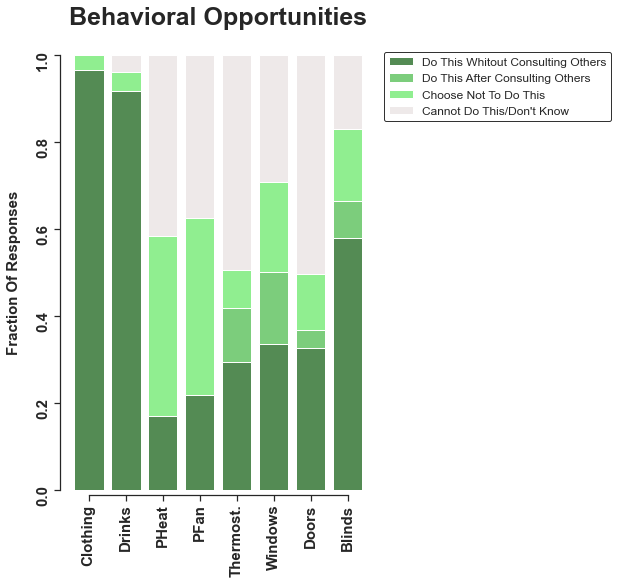

In [388]:
# Dataframe copy
df_beh = df[['4_avail_clth','4_avail_drinks','4_avail_lc_heater','4_avail_lc_fan','4_avail_thermostat','4_avail_window','4_avail_door','4_avail_blinds']]
df_beh = df_beh.dropna()
df_beh = df_beh.astype(int)

# print(df_beh.dtypes)

"""
# Check
print('Clothing')
print(df_beh['4_avail_clth'].isna().sum())
print(df_beh['4_avail_clth'].value_counts())
print(df_beh['4_avail_clth'].value_counts().sum())
print('Proprotion for 1')
print(round(df_beh['4_avail_clth'].value_counts(normalize=True).mul(1),2))
"""
# creating adjusted dataframe to generate graph
df_new = pd.concat([df_beh['4_avail_clth'].value_counts(normalize=True).mul(1),
                 df_beh['4_avail_drinks'].value_counts(normalize=True).mul(1),
                 df_beh['4_avail_lc_heater'].value_counts(normalize=True).mul(1),
                 df_beh['4_avail_lc_fan'].value_counts(normalize=True).mul(1),
                 df_beh['4_avail_thermostat'].value_counts(normalize=True).mul(1),
                 df_beh['4_avail_window'].value_counts(normalize=True).mul(1),
                 df_beh['4_avail_door'].value_counts(normalize=True).mul(1),
                 df_beh['4_avail_blinds'].value_counts(normalize=True).mul(1)],
                axis=1,keys=('Clothing','Drinks','PHeat','PFan','Thermost.','Windows','Doors','Blinds'))

dct_beh={0:'Cannot Do This/Don\'t Know',
     1:'Cannot Do This/Don\'t Know',
     2:'Choose Not To Do This',
     3:'Do This After Consulting Others',
     4:'Do This Whitout Consulting Others'}
df_new = df_new.rename(index=dct_beh)
df_new['Behavior']=df_new.index

df_new = df_new.groupby(['Behavior'], as_index=True).agg('sum').T
df_new = df_new[['Do This Whitout Consulting Others','Do This After Consulting Others',
                 'Choose Not To Do This','Cannot Do This/Don\'t Know']]

# creates a stacked bar plot
df_new.plot(kind='bar', stacked=True, color=['#548b54','#7ccd7c','#90ee90','#eee9e9'], 
            position=0.5, width=0.8, figsize=(5.5,8))
plt.title('Behavioral Opportunities', fontsize = 25, fontweight="bold", pad=30)

ax = plt.axes()
ax.set_facecolor("white") # Setting the background color
sns.despine(ax=ax, offset=5, trim=True,left=False,top=True,right=True) # the important part here  offset

#sns.set(style='ticks') to be removed
plt.legend(df_new.columns, loc='upper left', bbox_to_anchor=(1.02, 1.02), fontsize = 12, frameon=True, edgecolor='black')

# Manage axis look
sns.set(style='ticks')

#Axis settings
plt.xticks(fontsize=15, rotation=90, fontweight="bold")
plt.ylim(0, 1, 0.2)
plt.yticks(fontsize=15, rotation=90, fontweight="bold")
plt.ylabel('Fraction Of Responses', fontsize=15,fontweight="bold", labelpad=15)

plt.savefig('../OccupantBehaviorEnvironmentData/figures/BehavioralOpportunities.png', bbox_inches = 'tight', dpi=250)

# Fig - Survey Time of First Reported Action

<ipython-input-329-24e0083c3716>:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


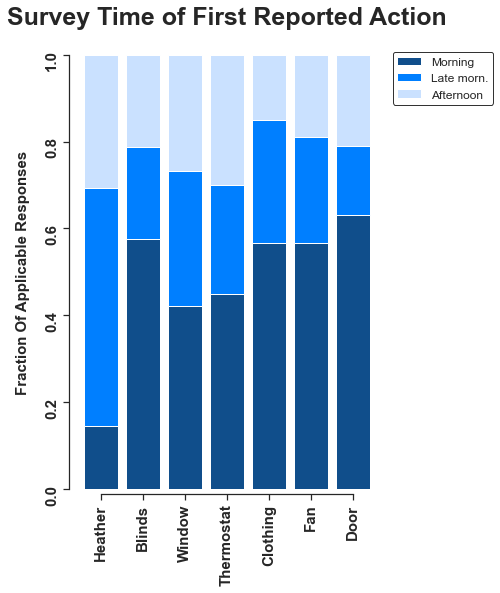

In [329]:
"""
Occupant number total is 24
The survey should be filled by every one during four periods - 75 days 

Summer Surveys - 30-07 / 18-08
Fall Surveys - 31-10 / 17/11
Winter Surveys - 28-01 /11-02
Spring Surveys - 01-04 / 26-04 

For All Action execpt
1 = TURNED ON without asking others
2 = TURNED ON after asking others
3 = TURNED OFF without asking others
4 = TURNED OFF after asking others

Clothing
0 = None
1 = Change (1 direction)
2 = Change (Up and down)
3 = No change, cannot adjust further
99 = N/A
"""


# Function to convert matlab datenum into python datetime
def datenum_to_datetime(datenum):
    """
    Convert Matlab datenum into Python datetime.
    :param datenum: Date in datenum format
    :return:        Datetime object corresponding to datenum.
    """
    days = datenum % 1
    hours = days % 1 * 24
    minutes = hours % 1 * 60
    seconds = minutes % 1 * 60
    return datetime.datetime.fromordinal(int(datenum)) \
           + datetime.timedelta(days=int(days)) \
           + datetime.timedelta(hours=int(hours)) \
           + datetime.timedelta(minutes=int(minutes)) \
           + datetime.timedelta(seconds=round(seconds)) \
           - datetime.timedelta(days=366)

# Dataframe copy
df_fra = df[['0_survey_time','0_time','0_occupant_nb','4_act_lc_heater','4_act_blinds','4_act_window','4_act_thermostat','4_clth_change','4_act_lc_fan','4_act_door']]
df_fra = df_fra.dropna()
df_fra['0_Datetime'] = df_fra['0_time'].apply(lambda x: datenum_to_datetime(x))
df_fra['Date_EU'] = pd.DatetimeIndex(df_fra['0_Datetime']).strftime('%d-%m-%Y')
df_fra['Time_EU'] = pd.DatetimeIndex(df_fra['0_Datetime']).strftime('%H:%M:%S')
#df_fra['0_occupant_nb'] = df_fra['0_occupant_nb'].astype(int)




# Selection the first action reported for each category and for each day & for each person
purge_1 = pd.to_datetime(df_fra['Time_EU']).groupby([df_fra['4_act_lc_heater'],df_fra['0_occupant_nb'],df_fra['Date_EU']]).idxmin()
df_fraf_1 = df_fra.loc[purge_1]

purge_2 = pd.to_datetime(df_fra['Time_EU']).groupby([df_fra['4_act_blinds'],df_fra['0_occupant_nb'],df_fra['Date_EU']]).idxmin()
df_fraf_2 = df_fra.loc[purge_2]

purge_3 = pd.to_datetime(df_fra['Time_EU']).groupby([df_fra['4_act_window'],df_fra['0_occupant_nb'],df_fra['Date_EU']]).idxmin()
df_fraf_3 = df_fra.loc[purge_3]

purge_4 = pd.to_datetime(df_fra['Time_EU']).groupby([df_fra['4_act_thermostat'],df_fra['0_occupant_nb'],df_fra['Date_EU']]).idxmin()
df_fraf_4 = df_fra.loc[purge_4]

purge_5 = pd.to_datetime(df_fra['Time_EU']).groupby([df_fra['4_clth_change'],df_fra['0_occupant_nb'],df_fra['Date_EU']]).idxmin()
df_fraf_5 = df_fra.loc[purge_5]

purge_6 = pd.to_datetime(df_fra['Time_EU']).groupby([df_fra['4_act_lc_fan'],df_fra['0_occupant_nb'],df_fra['Date_EU']]).idxmin()
df_fraf_6 = df_fra.loc[purge_6]

purge_7 = pd.to_datetime(df_fra['Time_EU']).groupby([df_fra['4_act_door'],df_fra['0_occupant_nb'],df_fra['Date_EU']]).idxmin()
df_fraf_7 = df_fra.loc[purge_7]




# creating adjusted dataframe to generate graph
df_fra2 = pd.concat([df_fraf_1['0_survey_time'][df_fraf_1['4_act_lc_heater']!=0].value_counts(normalize=True).mul(1),
                     df_fraf_2['0_survey_time'][df_fraf_2['4_act_blinds']!=0].value_counts(normalize=True).mul(1),
                     df_fraf_3['0_survey_time'][df_fraf_3['4_act_window']!=0].value_counts(normalize=True).mul(1),
                     df_fraf_4['0_survey_time'][df_fraf_4['4_act_thermostat']!=0].value_counts(normalize=True).mul(1),
                     df_fraf_5['0_survey_time'][df_fraf_5['4_clth_change']!=0].value_counts(normalize=True).mul(1),
                     df_fraf_6['0_survey_time'][df_fraf_6['4_act_lc_fan']!=0].value_counts(normalize=True).mul(1),
                     df_fraf_7['0_survey_time'][df_fraf_7['4_act_door']!=0].value_counts(normalize=True).mul(1)],
                    axis=1,keys=('Heather','Blinds','Window','Thermostat','Clothing','Fan','Door'))

dct_fra = {1:'Morning',
           2:'Late morn.',
           3:'Afternoon'}

df_fra2 = df_fra2.rename(index=dct_fra)
df_fra2['Time']=df_fra2.index
df_fra2 = df_fra2.groupby(['Time'], as_index=True).agg('sum').T
df_fra2 = df_fra2[['Morning','Late morn.','Afternoon']]




# creates a stacked bar plot
df_fra2.plot(kind='bar', stacked=True, color=['#104E8B','#007FFF','#CAE1FF'], 
            position=0.5, width=0.8, figsize=(5.5,8))
plt.title('Survey Time of First Reported Action', fontsize = 25, fontweight="bold", pad=30)

ax = plt.axes()
ax.set_facecolor("white") # Setting the background color
sns.despine(ax=ax, offset=5, trim=True,left=False,top=True,right=True) # the important part here  offset

#sns.set(style='ticks') to be removed
plt.legend(df_fra2.columns, loc='upper left', bbox_to_anchor=(1.02, 1.02), fontsize = 12, frameon=True, edgecolor='black')

# Manage axis look
sns.set(style='ticks')

#Axis settings
plt.xticks(fontsize=15, rotation=90, fontweight="bold")
plt.ylim(0, 1, 0.2)
plt.yticks(fontsize=15, rotation=90, fontweight="bold")
plt.ylabel('Fraction Of Applicable Responses', fontsize=15,fontweight="bold", labelpad=15)

plt.savefig('../OccupantBehaviorEnvironmentData/figures/Survey Time of First Reported Action.png', bbox_inches = 'tight', dpi=250)

# Fig - Upward Clo Adjust by Time of Day

<ipython-input-382-c9add83bdcdb>:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


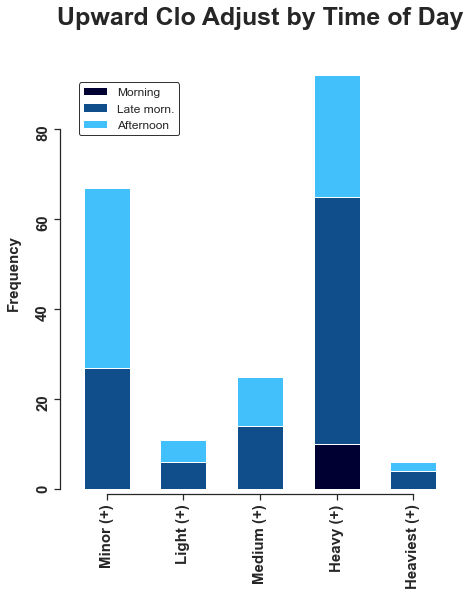

In [382]:
# Dataframe copy
df_up = df[['4_net_clth_change','4_clth_change_up','0_survey_time']]
df_up = df_up.dropna()
df_up = df_up[df_up['4_clth_change_up']==1]

"""
Based on minor change  = +/- 0.08 ; 
small change = +/- 0.18 ; 
moderate change = +/- 0.25 ; 
large change = +/- 0.32; 
largest change = +/- 0.44
"""

dct_fra = {1:'Morning',
           2:'Late morn.',
           3:'Afternoon'}

dct_change = {0.00:'Minor (+)',-0.08:'Minor (+)',0.08:'Minor (+)',0.07:'Minor (+)',
              -0.18:'Light (+)',0.18:'Light (+)',
              0.25:'Medium (+)',-0.25:'Medium (+)',0.24:'Medium (+)',
              0.32:'Heavy (+)',-0.32:'Heavy (+)',
              -0.44:'Heaviest (+)',0.44:'Heaviest (+)',-0.76:'Heaviest (+)',
              -0.57:'Heaviest (+)',-0.52:'Heaviest (+)',-0.69:'Heaviest (+)',
              -0.70:'Heaviest (+)',-0.37:'Heaviest (+)',-0.62:'Heaviest (+)',-0.50:'Heaviest (+)'}


# Mapping dictionnary to the dataframe
df_up['4_net_clth_change'] = df_up['4_net_clth_change'].map(dct_change)
df_up['0_survey_time'] = df_up['0_survey_time'].map(dct_fra)
df_up = df_up[['4_net_clth_change','0_survey_time']]


# creating adjusted dataframe to generate graph
df_up2 = pd.concat([df_up['0_survey_time'][df_up['4_net_clth_change']=='Minor (+)'].value_counts(),
                    df_up['0_survey_time'][df_up['4_net_clth_change']=='Light (+)'].value_counts(),
                    df_up['0_survey_time'][df_up['4_net_clth_change']=='Medium (+)'].value_counts(),
                    df_up['0_survey_time'][df_up['4_net_clth_change']=='Heavy (+)'].value_counts(),
                    df_up['0_survey_time'][df_up['4_net_clth_change']=='Heaviest (+)'].value_counts()],
                   axis=1,keys=('Minor (+)','Light (+)','Medium (+)','Heavy (+)','Heaviest (+)')).T
df_up2 = df_up2[['Morning','Late morn.','Afternoon']]


# creates a stacked bar plot
df_up2.plot(kind='bar', stacked=True, color=['#000033','#104E8B','#42C0FB'], 
            position=0.5, width=0.6, figsize=(7,8))
plt.title('Upward Clo Adjust by Time of Day', fontsize = 25, fontweight="bold", pad=30)

ax = plt.axes()
ax.set_facecolor("white") # Setting the background color
sns.despine(ax=ax, offset=5, trim=True,left=False,top=True,right=True) # the important part here offset

#sns.set(style='ticks') to be removed
plt.legend(df_up2.columns, loc='upper left', bbox_to_anchor=(0.02, 0.95), fontsize = 12, frameon=True, edgecolor='black')

# Manage axis look
sns.set(style='ticks')

#Axis settings
plt.xticks(fontsize=15, rotation=90, fontweight="bold")
plt.yticks(fontsize=15, rotation=90, fontweight="bold")
plt.ylabel('Frequency', fontsize=15,fontweight="bold", labelpad=15)

plt.savefig('../OccupantBehaviorEnvironmentData/figures/Upward Clo Adjust by Time of Day.png', bbox_inches = 'tight', dpi=250)

# Fig - Downward Clo Adjust by Time of Day

<ipython-input-387-70a862de08a0>:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


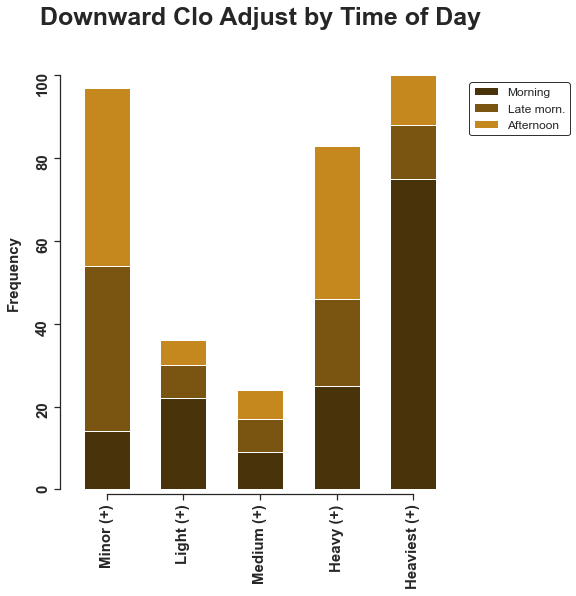

In [387]:
# Dataframe copy
df_down = df[['4_net_clth_change','4_clth_change_down','0_survey_time']]
df_down = df_down.dropna()
df_down = df_down[df_down['4_clth_change_down']==1]

"""
Based on minor change  = +/- 0.08 ; 
small change = +/- 0.18 ; 
moderate change = +/- 0.25 ; 
large change = +/- 0.32; 
largest change = +/- 0.44
"""

dct_fra = {1:'Morning',
           2:'Late morn.',
           3:'Afternoon'}

dct_change = {0.00:'Minor (+)',-0.08:'Minor (+)',0.08:'Minor (+)',0.07:'Minor (+)',
              -0.18:'Light (+)',0.18:'Light (+)',
              0.25:'Medium (+)',-0.25:'Medium (+)',0.24:'Medium (+)',
              0.32:'Heavy (+)',-0.32:'Heavy (+)',
              -0.44:'Heaviest (+)',0.44:'Heaviest (+)',-0.76:'Heaviest (+)',
              -0.57:'Heaviest (+)',-0.52:'Heaviest (+)',-0.69:'Heaviest (+)',
              -0.70:'Heaviest (+)',-0.37:'Heaviest (+)',-0.62:'Heaviest (+)',-0.50:'Heaviest (+)'}


# Mapping dictionnary to the dataframe
df_down['4_net_clth_change'] = df_down['4_net_clth_change'].map(dct_change)
df_down['0_survey_time'] = df_down['0_survey_time'].map(dct_fra)
df_down = df_down[['4_net_clth_change','0_survey_time']]


# creating adjusted dataframe to generate graph
df_down2 = pd.concat([df_down['0_survey_time'][df_down['4_net_clth_change']=='Minor (+)'].value_counts(),
                    df_down['0_survey_time'][df_down['4_net_clth_change']=='Light (+)'].value_counts(),
                    df_down['0_survey_time'][df_down['4_net_clth_change']=='Medium (+)'].value_counts(),
                    df_down['0_survey_time'][df_down['4_net_clth_change']=='Heavy (+)'].value_counts(),
                    df_down['0_survey_time'][df_down['4_net_clth_change']=='Heaviest (+)'].value_counts()],
                   axis=1,keys=('Minor (+)','Light (+)','Medium (+)','Heavy (+)','Heaviest (+)')).T
df_down2 = df_down2[['Morning','Late morn.','Afternoon']]


# creates a stacked bar plot
df_down2.plot(kind='bar', stacked=True, color=['#49330b','#7a5512','#c4881e'], 
            position=0.5, width=0.6, figsize=(7,8))
plt.title('Downward Clo Adjust by Time of Day', fontsize = 25, fontweight="bold", pad=30)

ax = plt.axes()
ax.set_facecolor("white") # Setting the background color
sns.despine(ax=ax, offset=5, trim=True,left=False,top=True,right=True) # the important part here offset

#sns.set(style='ticks') to be removed
plt.legend(df_down2.columns, loc='upper left', bbox_to_anchor=(1.02, 0.95), fontsize = 12, frameon=True, edgecolor='black')

# Manage axis look
sns.set(style='ticks')

#Axis settings
plt.xticks(fontsize=15, rotation=90, fontweight="bold")
plt.yticks(fontsize=15, rotation=90, fontweight="bold")
plt.ylabel('Frequency', fontsize=15,fontweight="bold", labelpad=15)

plt.savefig('../OccupantBehaviorEnvironmentData/figures/Downward Clo Adjust by Time of Day.png', bbox_inches = 'tight', dpi=250)

# Generating Table - Occupant Sample Characteristics

Gender

In [ ]:
dct_gdr = {1:'Male',2:'Female'}

gdr = pd.concat([round(df['2_gender'].value_counts(normalize=True).mul(1)*24,0).astype(int),
                round(df['2_gender'].value_counts(normalize=True).mul(100),0).astype(int)],
                axis=1,keys=('N','% of final sample'))

gdr = gdr.rename(index=dct_gdr)
gdr['Category'] = gdr.index
gdr=gdr[['Category','N','% of final sample']]
#gdr.reset_index(drop=True)
gdr = gdr.rename(index={'Female':'Gender','Male':'Gender'})
gdr

Office Type

In [19]:
dct_off = {1:'Private',2:'Shared private',3:'Cubicle',4:'Open Desk',5:'Open Desk'}

off = pd.concat([round(df['2_off_type'].value_counts(normalize=True).mul(1)*24,0).astype(int),
                round(df['2_off_type'].value_counts(normalize=True).mul(100),0).astype(int)],
                axis=1,keys=('N','% of final sample'))

off = off.rename(index=dct_off)
off['Category'] = off.index
off=off[['Category','N','% of final sample']]

off = off.groupby(by='Category', as_index=False).sum()
off = off.rename(index={0:'Office type',1:'Office type',2:'Office type',3:'Office type'})
off

,Category,N,% of final sample
Office type,Cubicle,10,42
Office type,Open Desk,5,21
Office type,Private,6,25
Office type,Shared private,3,12


Office Location

In [20]:
dct_loc = {1:'Core',2:'Perimeter'}

loc = pd.concat([round(df['2_loc_floor'].value_counts(normalize=True).mul(1)*24,0).astype(int),
                round(df['2_loc_floor'].value_counts(normalize=True).mul(100),0).astype(int)],
                axis=1,keys=('N','% of final sample'))

loc = loc.rename(index=dct_loc)
loc['Category'] = loc.index
loc=loc[['Category','N','% of final sample']]

loc = loc.rename(index={'Perimeter':'Office location','Core':'Office location'})
loc

,Category,N,% of final sample
Office location,Perimeter,15,63
Office location,Core,9,37


Available controls

In [21]:
"""
0 = Don't Know ; 
1 = Not Allowed / Possible ; 
2 = I Can Do This, But Choose Not To; 
3 = I Do This But Generally Need to Consult Others First ; 
4 = I Do This Without Consulting Others
"""
dct_ctr = {0:'not used',1:'not used',2:'not used',3:'used',4:'used'}

In [22]:
htr = pd.concat([round(df['4_avail_lc_heater'].value_counts(normalize=True).mul(1)*24,0).astype(int),
                round(df['4_avail_lc_heater'].value_counts(normalize=True).mul(100),0).astype(int)],
                axis=1,keys=('N','% of final sample'))

htr = htr.rename(index=dct_ctr)
htr['Category'] = htr.index
htr = htr[['Category','N','% of final sample']]
htr = htr[htr['Category']=='used']
htr = htr.groupby(by='Category', as_index=False).sum()
htr = htr.rename(index={0:'Available controls'})
htr

,Category,N,% of final sample
Available controls,used,4,17


In [23]:
fan = pd.concat([round(df['4_avail_lc_fan'].value_counts(normalize=True).mul(1)*24,0).astype(int),
                round(df['4_avail_lc_fan'].value_counts(normalize=True).mul(100),0).astype(int)],
                axis=1,keys=('N','% of final sample'))

fan = fan.rename(index=dct_ctr)
fan['Category'] = fan.index
fan = fan[['Category','N','% of final sample']]
fan = fan[fan['Category']=='used']
fan['Category']='Heater'
fan = fan.reset_index(drop=True)
fan = fan.rename(index={0:'Available controls'})
fan

,Category,N,% of final sample
Available controls,Heater,5,22


In [24]:
thm = pd.concat([round(df['4_avail_thermostat'].value_counts(normalize=True).mul(1)*24,0).astype(int),
                round(df['4_avail_thermostat'].value_counts(normalize=True).mul(100),0).astype(int)],
                axis=1,keys=('N','% of final sample'))

thm = thm.rename(index=dct_ctr)
thm['Category'] = thm.index
thm = thm[['Category','N','% of final sample']]
thm = thm[thm['Category']=='used']
thm = thm.groupby(by='Category', as_index=False).sum()
thm['Category']='Thermostat'
thm = thm.rename(index={0:'Available controls'})
thm

,Category,N,% of final sample
Available controls,Thermostat,10,41


In [25]:
wdw = pd.concat([round(df['4_avail_window'].value_counts(normalize=True).mul(1)*24,0).astype(int),
                round(df['4_avail_window'].value_counts(normalize=True).mul(100),0).astype(int)],
                axis=1,keys=('N','% of final sample'))

wdw = wdw.rename(index=dct_ctr)
wdw['Category'] = wdw.index
wdw = wdw[['Category','N','% of final sample']]
wdw = wdw[wdw['Category']=='used']
wdw = wdw.groupby(by='Category', as_index=False).sum()
wdw['Category']='Windows'
wdw = wdw.rename(index={0:'Available controls'})
wdw

,Category,N,% of final sample
Available controls,Windows,12,50


In [26]:
dr = pd.concat([round(df['4_avail_door'].value_counts(normalize=True).mul(1)*24,0).astype(int),
                round(df['4_avail_door'].value_counts(normalize=True).mul(100),0).astype(int)],
                axis=1,keys=('N','% of final sample'))

dr = dr.rename(index=dct_ctr)
dr['Category'] = dr.index
dr = dr[['Category','N','% of final sample']]
dr = dr[dr['Category']=='used']
dr = dr.groupby(by='Category', as_index=False).sum()
dr['Category']='Doors'
dr = dr.rename(index={0:'Available controls'})
dr

,Category,N,% of final sample
Available controls,Doors,9,36


In [27]:
bld = pd.concat([round(df['4_avail_blinds'].value_counts(normalize=True).mul(1)*24,0).astype(int),
                round(df['4_avail_blinds'].value_counts(normalize=True).mul(100),0).astype(int)],
                axis=1,keys=('N','% of final sample'))


bld = bld.rename(index=dct_ctr)
bld['Category'] = bld.index
bld = bld[['Category','N','% of final sample']]
bld = bld[bld['Category']=='used']
bld = bld.groupby(by='Category', as_index=False).sum()
bld['Category']='Blinds'
bld = bld.rename(index={0:'Available controls'})
bld

,Category,N,% of final sample
Available controls,Blinds,16,66


Gen. thermal comfort

In [28]:
#1 = Very UNCOMF. ; 2 = UNCOMF. ; 3 = Somewhat UNCOMF. 4 = Somewhat COMF. ; 5 = COMF. ; 6 = Very COMF.
dct_comf = {1:'≥ Comfortable',2:'≥ Comfortable',3:'≥ Comfortable',
            4:'< Comfortable',5:'< Comfortable',6:'< Comfortable'}

comf = pd.concat([round(df['3_gen_th_cmf'].value_counts(normalize=True).mul(1)*24,0).astype(int),
                round(df['3_gen_th_cmf'].value_counts(normalize=True).mul(100),0).astype(int)],
                axis=1,keys=('N','% of final sample'))

comf = comf.rename(index=dct_comf)
comf['Category'] = comf.index
comf=comf[['Category','N','% of final sample']]

comf = comf.groupby(by='Category', as_index=False).sum()
comf = comf.rename(index={0:'Gen. thermal comfort',1:'Gen. thermal comfort'})
comf

,Category,N,% of final sample
Gen. thermal comfort,< Comfortable,21,87
Gen. thermal comfort,≥ Comfortable,3,12


Gen. perceived ctl. satisfaction

In [29]:
#1 = Very DISSATISFIED ; 2 = DISSATISFIED ; 3 = Somewhat DISSATISFIED ; 4 = Somewhat SATISFIED ; 5 = SATISFIED ; 6 = Very SATISFIED
dct_sat = {1:'≥ Satisfied',2:'≥ Satisfied',3:'≥ Satisfied',
           4:'< Satisfied',5:'< Satisfied',6:'< Satisfied'}

sat = pd.concat([round(df['3_gen_satisf_wcontrol'].value_counts(normalize=True).mul(1)*24,0).astype(int),
                round(df['3_gen_satisf_wcontrol'].value_counts(normalize=True).mul(100),0).astype(int)],
                axis=1,keys=('N','% of final sample'))

sat = sat.rename(index=dct_sat)
sat['Category'] = sat.index
sat=sat[['Category','N','% of final sample']]

sat = sat.groupby(by='Category', as_index=False).sum()
sat = sat.rename(index={0:'Gen. perceived ctl. satisfaction',1:'Gen. perceived ctl. satisfaction'})
sat

,Category,N,% of final sample
Gen. perceived ctl. satisfaction,< Satisfied,6,25
Gen. perceived ctl. satisfaction,≥ Satisfied,18,76


MAIN TABLE CREATION

In [30]:
table_1 = pd.concat([gdr,off,loc,htr,fan,thm,wdw,dr,bld,comf,sat])

In [31]:
table_1

,Category,N,% of final sample
Gender,Female,16,67
Gender,Male,8,33
Office type,Cubicle,10,42
Office type,Open Desk,5,21
Office type,Private,6,25
Office type,Shared private,3,12
Office location,Perimeter,15,63
Office location,Core,9,37
Available controls,used,4,17
Available controls,Heater,5,22


# Fig. Preferres temperature sensations

In [54]:
#Preferred Temperature Sensation

In [55]:
print(df['2_therm_pref'].value_counts(normalize=True).mul(100))
print(df['3_th_sen'].value_counts(normalize=True).mul(100))

 0.0    52.650177
-1.0    26.325088
 1.0    16.784452
 2.0     4.063604
-2.0     0.176678
Name: 2_therm_pref, dtype: float64
 0.0    48.498198
-1.0    20.664798
 1.0    17.981578
-2.0     5.486584
 2.0     5.366440
-3.0     1.041249
-2.5     0.720865
 3.0     0.160192
 2.5     0.080096
Name: 3_th_sen, dtype: float64


In [53]:
#ASHRAE 7 point scale
dct_ashrae = {6.0:'Very Warm',
              5.5:'Moderate/Very Warm',
              5.0:'Moderate Warm',
              4.5:'Moderate/Slightly Warm',
              4.0:'Slightly Warm',
              3.5:'Neutral',
              3.0:'Slightly Cool',
              2.0:'Moderate/Slightly Cool'}

In [59]:
th_sum = pd.concat([round(df['2_med_acc_sen_sum'].value_counts(normalize=True).mul(1)*24,0).astype(int),
                round(df['2_med_acc_sen_sum'].value_counts(normalize=True).mul(100),0).astype(int)],
                axis=1,keys=('N','% of final sample'))


th_sum = th_sum.rename(index=dct_ashrae)
th_sum['Category'] = th_sum.index
th_sum=th_sum[['Category','N','% of final sample']]

th_sum = th_sum.groupby(by='Category', as_index=False).sum()
th_sum

,Category,N,% of final sample
0,Moderate Warm,3,12
1,Moderate/Slightly Cool,1,4
2,Moderate/Slightly Warm,5,20
3,Moderate/Very Warm,3,13
4,Neutral,2,9
5,Slightly Cool,4,17
6,Slightly Warm,5,20
7,Very Warm,1,4


In [41]:
th_win = pd.concat([round(df['2_med_acc_sen_win'].value_counts(normalize=True).mul(1)*24,0).astype(int),
                round(df['2_med_acc_sen_win'].value_counts(normalize=True).mul(100),0).astype(int)],
                axis=1,keys=('N','% of final sample')) 
th_sum

,N,% of final sample
4.0,5,20
4.5,5,20
3.0,4,17
5.5,3,13
5.0,3,12
3.5,2,9
2.0,1,4
6.0,1,4


In [46]:
df[['2_min_acc_sen',
'2_med_acc_sen',
'2_max_acc_sen',
'2_min_acc',
'2_med_acc',
'2_max_acc',
'2_therm_pref',
'2_min_acc_sen_sum',
'2_min_acc_sen_win',
'2_med_acc_sen_sum',
'2_med_acc_sen_win',
'2_max_acc_sen_sum',
'2_max_acc_sen_win']].describe()

,2_min_acc_sen,2_med_acc_sen,2_max_acc_sen,2_min_acc,2_med_acc,2_max_acc,2_therm_pref,2_min_acc_sen_sum,2_min_acc_sen_win,2_med_acc_sen_sum,2_med_acc_sen_win,2_max_acc_sen_sum,2_max_acc_sen_win
count,840984.000000,840984.000000,840984.000000,811032.000000,811032.000000,811032.000000,566.000000,788604.000000,788604.000000,788604.000000,788604.000000,788604.000000,788604.000000
mean,-0.911961,-0.045067,-0.042366,-0.916151,0.001052,0.920504,-0.017668,-1.656118,-0.851079,4.191059,5.102996,0.210227,1.163618
std,0.883369,0.678595,0.680957,0.852239,0.645320,0.779638,0.775537,0.850421,1.399256,0.978627,1.160735,1.379853,1.197090
min,-3.000000,-2.500000,-2.500000,-3.000000,-2.000000,-2.000000,-2.000000,-3.000000,-3.000000,2.000000,2.000000,-2.500000,-2.500000
25%,-2.000000,-0.500000,-0.500000,-1.000000,-0.500000,1.000000,-1.000000,-2.500000,-2.000000,3.500000,4.500000,-1.000000,1.000000
50%,-1.000000,0.000000,0.000000,-1.000000,0.000000,1.000000,0.000000,-2.000000,-1.000000,4.000000,5.000000,0.000000,2.000000
75%,0.000000,0.500000,0.500000,0.000000,0.500000,1.000000,0.000000,-1.000000,0.000000,5.000000,5.500000,1.000000,2.000000
max,2.000000,2.500000,3.000000,2.000000,2.000000,2.500000,2.000000,1.000000,2.000000,6.000000,7.500000,2.000000,2.500000


In [49]:
df['2_med_acc_sen_win']

0         6.0
1         6.0
2         6.0
3         6.0
4         6.0
         ... 
840979    NaN
840980    NaN
840981    NaN
840982    NaN
840983    NaN
Name: 2_med_acc_sen_win, Length: 840984, dtype: float64

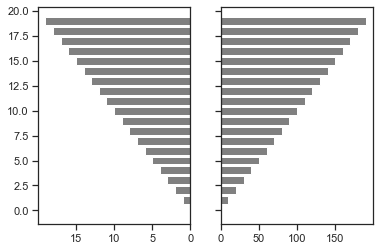

In [52]:
y = range(20)
x1 = range(20)
x2 = range(0, 200, 10)

fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, x1, align='center', color='gray')
axes[1].barh(y, x2, align='center', color='gray')
axes[0].invert_xaxis()
plt.show()

In [ ]:
"""['Very Warm',
      'Moderate/Very Warm',
      'Moderate Warm',
      'Moderate/Slightly Warm',
      'Slightly Warm',
      'Neutral',
      'Slightly Cool',
      'Moderate/Slightly Cool']"""

x_sum = df['2_med_acc_sen_sum']
x_win = df['2_med_acc_sen_win']

TypeError: barh() missing 1 required positional argument: 'width'

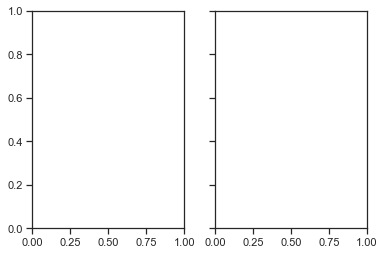

In [51]:
fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(x_sum, align='center', color='gray')
axes[1].barh(x_win, align='center', color='gray')
axes[0].invert_xaxis()
plt.show()